In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/preprocessed_data (1).csv')

In [3]:
data.dtypes

,0
customerid,int64
entity,int64
name,object
surname,object
birthdate,object
sex,int64
country,int64
state,int64
purpose,int64
deal_satisfaction,int64


In [4]:
data['birthdate'] = data['birthdate'].astype('datetime64[ns]')
data['datesale'] = data['datesale'].astype('datetime64[ns]')
data['name'] = data['name'].astype('string')
data['surname'] = data['surname'].astype('string')

In [5]:
# Calculating the  age at the time of sale
data['age_at_sale'] = ((data['datesale'] - data['birthdate']).dt.days /  365.25 ).round(0)

# Displaying  the results
print(data[['birthdate', 'datesale', 'age_at_sale']])

     birthdate   datesale  age_at_sale
0   1931-02-13 2007-06-01         76.0
1   1932-06-13 2005-04-01         73.0
2   1933-05-05 2006-05-01         73.0
3   1933-06-08 2006-03-01         73.0
4   1936-08-13 2007-06-01         71.0
..         ...        ...          ...
262 1986-06-21 2004-11-01         18.0
263 1986-06-21 2005-12-01         19.0
264 1986-06-21 2005-12-01         19.0
265 1986-06-21 2005-09-01         19.0
266 1986-06-21 2004-03-01         18.0

[267 rows x 3 columns]


In [6]:
# Define age intervals
age_intervals = [19.0, 25.0, 31.0, 36.0, 42.0, 48.0, 54.0, 59.0, 65.0, 71.0, 76.0, float('inf')]

In [7]:
data['age_interval'] = pd.cut(data['age_at_sale'], bins=age_intervals, right=False)

In [8]:
# Display the results
print(data[['birthdate', 'datesale', 'age_at_sale', 'age_interval']].head(10))

   birthdate   datesale  age_at_sale  age_interval
0 1931-02-13 2007-06-01         76.0   [76.0, inf)
1 1932-06-13 2005-04-01         73.0  [71.0, 76.0)
2 1933-05-05 2006-05-01         73.0  [71.0, 76.0)
3 1933-06-08 2006-03-01         73.0  [71.0, 76.0)
4 1936-08-13 2007-06-01         71.0  [71.0, 76.0)
5 1936-08-13 2007-06-01         71.0  [71.0, 76.0)
6 1937-01-20 2004-08-01         68.0  [65.0, 71.0)
7 1938-06-09 2007-10-01         69.0  [65.0, 71.0)
8 1938-06-09 2007-10-01         69.0  [65.0, 71.0)
9 1938-10-29 2007-08-01         69.0  [65.0, 71.0)


Break down by age intervals. Finally, using summary statistics, determine how many properties have been sold by age intervals

In [ ]:
data['age_interval'].value_counts()

,count
age_interval,
"[42.0, 48.0)",99
"[36.0, 42.0)",28
"[31.0, 36.0)",24
"[48.0, 54.0)",24
"[54.0, 59.0)",20
"[19.0, 25.0)",17
"[25.0, 31.0)",16
"[65.0, 71.0)",16
"[59.0, 65.0)",13


In [9]:
# Group by age interval and count the number of sold properties
age_interval_counts = data[data['status'] == 1].groupby('age_interval').size().reset_index(name='properties_sold')
print(age_interval_counts)

    age_interval  properties_sold
0   [19.0, 25.0)                0
1   [25.0, 31.0)                0
2   [31.0, 36.0)                0
3   [36.0, 42.0)                0
4   [42.0, 48.0)               72
5   [48.0, 54.0)                0
6   [54.0, 59.0)                0
7   [59.0, 65.0)                0
8   [65.0, 71.0)                0
9   [71.0, 76.0)                0
10   [76.0, inf)                0


<ipython-input-9-c25af3647e4d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_interval_counts = data[data['status'] == 1].groupby('age_interval').size().reset_index(name='properties_sold')


Analyzing Properties

In [10]:
# Create 10 bins for price intervals
data['price_interval'] = pd.cut(data['price'], bins=10)

print(data[['price', 'price_interval']])

         price            price_interval
0    296483.14  (285847.138, 327917.905]
1    261579.89  (243776.371, 285847.138]
2    222867.42  (201705.604, 243776.371]
3    291494.36  (285847.138, 327917.905]
4    204292.49  (201705.604, 243776.371]
..         ...                       ...
262  317196.40  (285847.138, 327917.905]
263  246050.40  (243776.371, 285847.138]
264  250312.53  (243776.371, 285847.138]
265  222947.21  (201705.604, 243776.371]
266  117564.07  (117143.362, 159634.837]

[267 rows x 2 columns]



Relationship between Properties and Age

In [11]:
# Calculate covariance and correlation between properties and age
covariance = data['price'].cov(data['age_at_sale'])
correlation = data['price'].corr(data['age_at_sale'])
print(f'Covariance between price and age: {covariance}')
print(f'Correlation between price and age: {correlation}')

Covariance between price and age: -103312.47316676524
Correlation between price and age: -0.09288088627670645


**Data Visualization**
We’re now ready to answer the client’s following critical questions regarding the data.

1.What is the average deal satisfaction for each country? How does it look by state?

2.What is the monthly revenue of the company?

3.How many apartments are sold in each state?

4.What is the age distribution for customers? (Use the same age intervals or number of bins from the data analysis stage.)

5.What are the yearly sales for each building?

-To answer these questions, we can create the following visualizations:

--Deal Satisfaction by Country – A bar chart or a heat map that represents average deal satisfaction by country

--Revenue Graph – A time-series graph showing the total revenue over time

--Apartments Sold by State – A pareto chart, in which the bar shows the absolute frequency of buildings sold by state, and the line chart displays the cumulative frequency

--Age Distribution Histogram – A histogram displaying the age distribution of customers

--Sales per Year by Building Type – A stacked bar graph or a line graph showing the yearly sales for each building type

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

1 - Deal Satisfaction by Country

<ipython-input-15-30b41a861e54>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')
<ipython-input-15-30b41a861e54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')


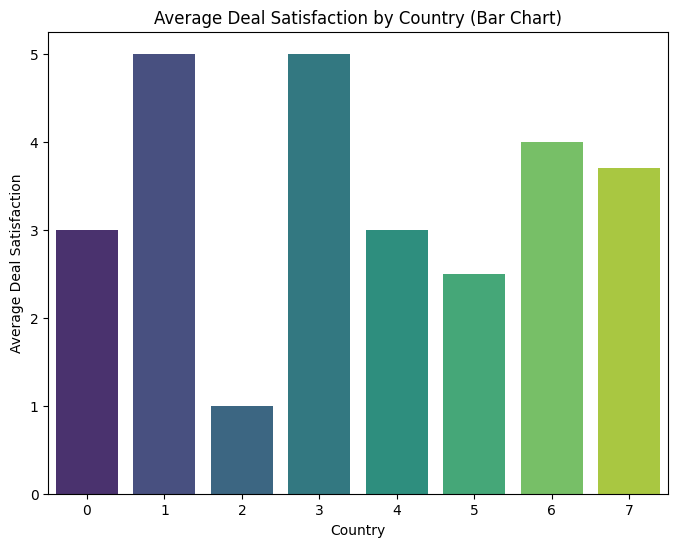

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')

plt.title('Average Deal Satisfaction by Country (Bar Chart)')
plt.xlabel('Country')
plt.ylabel('Average Deal Satisfaction')
plt.show()

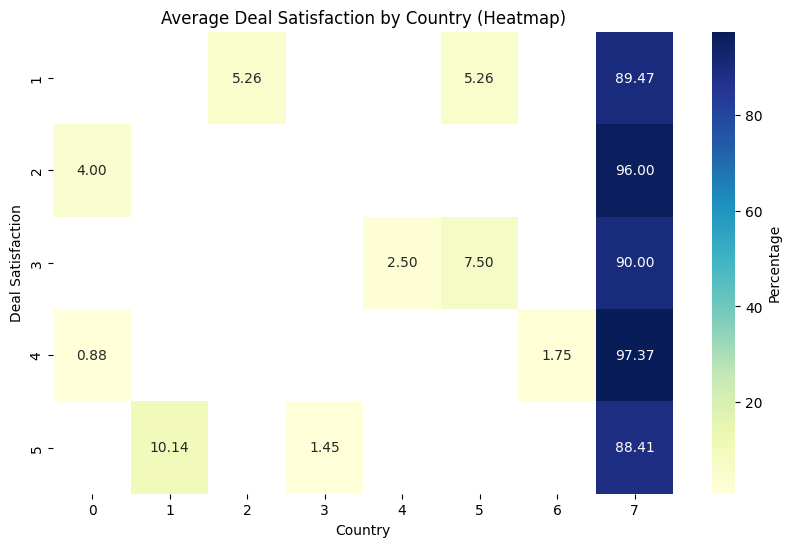

In [16]:
heatmap_data = data.groupby(['country', 'deal_satisfaction']).size().unstack().T
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100  # Convert to percentages
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})
plt.title('Average Deal Satisfaction by Country (Heatmap)')
plt.xlabel('Country')
plt.ylabel('Deal Satisfaction')
plt.show()

Revenue Graph – Total Revenue Over Time (Time-Series)

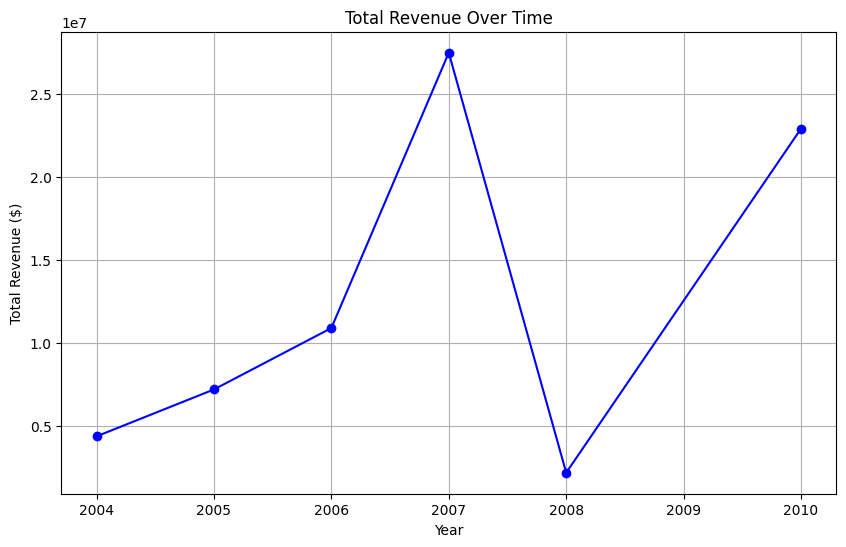

In [17]:
plt.figure(figsize=(10, 6))
data['datesale_year'] = data['datesale'].dt.year
revenue_per_year = data.groupby('datesale_year')['price'].sum()

revenue_per_year.plot(kind='line', marker='o', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()

Apartments Sold by State – Pareto Chart

<ipython-input-18-2f0d93ebb4cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts, palette='viridis')


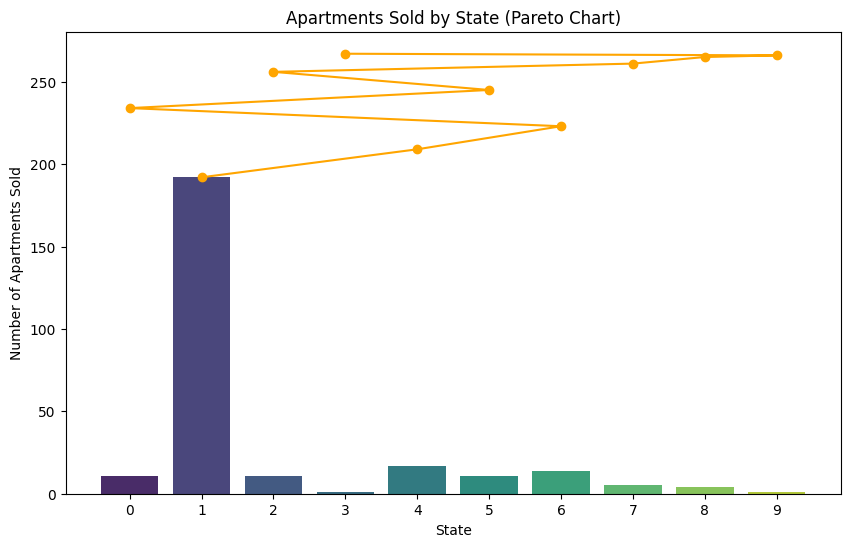

In [18]:
plt.figure(figsize=(10, 6))
state_counts = data['state'].value_counts()
state_cumulative = state_counts.cumsum()

sns.barplot(x=state_counts.index, y=state_counts, palette='viridis')
plt.plot(state_cumulative.index, state_cumulative, color='orange', marker='o')

plt.title('Apartments Sold by State (Pareto Chart)')
plt.xlabel('State')
plt.ylabel('Number of Apartments Sold')
plt.show()

Age Distribution Histogram

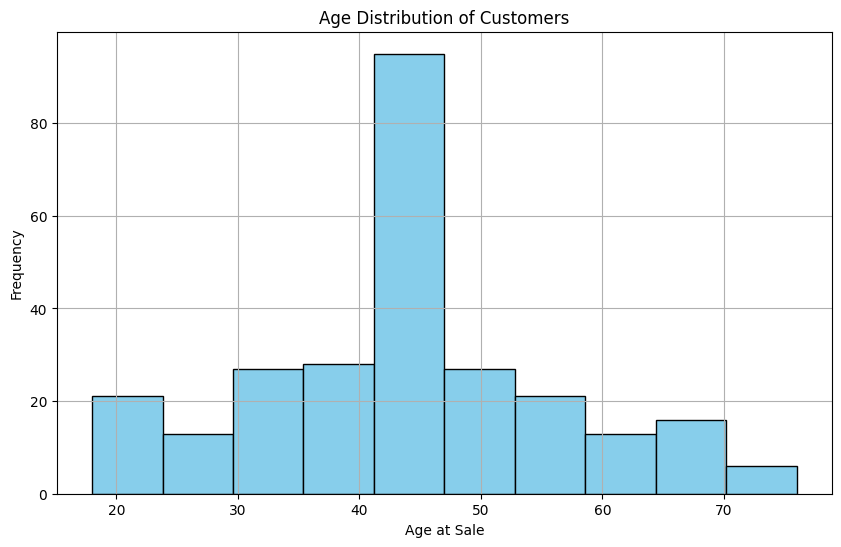

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data['age_at_sale'], bins=10, color='skyblue', edgecolor='black')

plt.title('Age Distribution of Customers')
plt.xlabel('Age at Sale')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Sales per Year by Building Type – Stacked Bar Graph

<Figure size 1400x800 with 0 Axes>

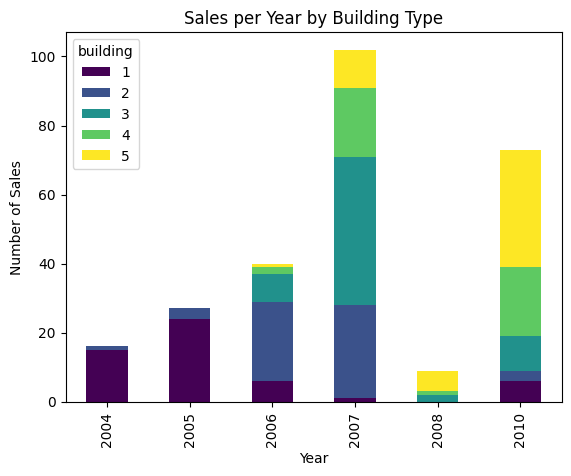

In [20]:
plt.figure(figsize=(14, 8))
building_type_sales = data.groupby(['datesale_year', 'building'])['customerid'].count().unstack()

building_type_sales.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sales per Year by Building Type')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

In a stacked bar graph, each bar represents a category (in this case, a year), and the total bar height shows the total count or value for that category. Within each bar, different segments represent sub-categories (in this case, different building types). The height of each segment within the bar indicates the count or value of that sub-category for the corresponding category.





---Data Interpretation
Based on the data analysis, what can you conclude about the customer profile, as well as the building characteristics?

We need to ask questions such as:

1.Which customer age bracket has the most buyers potential?
2.What is the most sought after building?
3.What is the highest priced building?

In [21]:
# Filter data for building type 1
building_type_1_data = data[data['building'] == 1]

# Calculate the average area for building type 1
average_area_building_type_1 = building_type_1_data['area'].mean()

print(f"The average area of building type 1 is: {average_area_building_type_1} square feet")

The average area of building type 1 is: 928.0388461538464 square feet


In [22]:
# Count the occurrences of each property type
property_type_counts = data['type'].value_counts()
(print(property_type_counts))
# Find the property type with the highest count
most_common_property_type = property_type_counts.idxmax()

print(f"The most common property type sold is: {most_common_property_type}")

type
0    259
1      8
Name: count, dtype: int64
The most common property type sold is: 0


In [23]:
# Group by building and calculate the average property price
average_price_by_building = data.groupby('building')['price'].mean()

# Find the building with the highest average price
highest_avg_price_building = average_price_by_building.idxmax()

print(f"The building with the highest average property price is: {highest_avg_price_building}")

The building with the highest average property price is: 4


In [24]:
# Group by state and count the number of properties sold in each state
state_property_counts = data['state'].value_counts()

# Find the second-highest number of properties sold
second_highest_state = state_property_counts.index[1]

print("State with the second-highest number of properties sold:", second_highest_state)

State with the second-highest number of properties sold: 4


In [25]:
# Define the price intervals
price_intervals = pd.cut(data['price'], bins=10)

# Count the number of unsold properties in the last interval
unsold_properties_last_interval = data[data['status'] == 0]['price'][price_intervals == price_intervals.iloc[-1]].count()

print("Number of unsold properties in the last interval:", unsold_properties_last_interval)

Number of unsold properties in the last interval: 2
